# Introduction to Neural Networks 


** Ecole Centrale Nantes **

** Diana Mateus **


** Participants : **



## General description
In this lab we will create a simple classifier based on neural networks. We will progress in two parts:
- In the first part, and to better understand the involved operations, we will create a single-neuron model and optimize its parameters "by hand". For this first part we will only use the **Numpy** library
- We will then build a multi-layer perceptron with the built-in library **Keras** module and **tensorflow**. Tensorflow is already installed in the university computers. If using your own computer you should have already installed **tensorflow** or use **collab** online platform.




In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

### Loading the dataset
Start by runing the following lines to load and visualize the data.

In [4]:
def load_dataset():
    train_dataset = h5py.File('dataset/train_catvnoncat.h5', "r")
    train_x = np.array(train_dataset["train_set_x"][:]) 
    train_y = np.array(train_dataset["train_set_y"][:])
    test_dataset = h5py.File('dataset/test_catvnoncat.h5', "r")
    test_x = np.array(test_dataset["test_set_x"][:]) 
    test_y = np.array(test_dataset["test_set_y"][:])
    classes = np.array(test_dataset["list_classes"][:]) 
    
    train_y = train_y.reshape((1, train_y.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))
    
    return train_x, train_y, test_x, test_y, classes

train_x, train_y, test_x, test_y, classes=load_dataset()

#### Visualize data

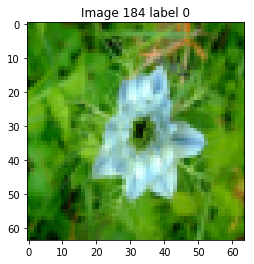

Train X shape: (209, 64, 64, 3)
We have 209 images of dimensionality 64x64x3


In [5]:
# run several times to visualize different data points
# the title shows the ground truth class labels (0=no cat , 1 = cat)
index = np.random.randint(low=0,high=train_y.shape[1])
plt.imshow(train_x[index])
plt.title("Image "+str(index)+" label "+str(train_y[0,index]))
plt.show()
print ("Train X shape: " + str(train_x.shape))
print ("We have "+str(train_x.shape[0]), 
       "images of dimensionality " 
       + str(train_x.shape[1])+ "x"
       + str(train_x.shape[2])+ "x"
       + str(train_x.shape[3]))

#### Preprocessing
In the following lines we vectorize the images (Instead of a 2-D image we will give as input to the models a 1-D vector). The normalization makes the image intensities be between 0 and 1, and converts the images to floats.

In [26]:
# Reshape the data
train_x = train_x.reshape(train_x.shape[0], -1).T
test_x = test_x.reshape(test_x.shape[0], -1).T
print ("Train X shape: " + str(train_x.shape))
print ("Train Y shape: " + str(train_y.shape))
print ("Test X shape: " + str(test_x.shape))
print ("Test Y shape: " + str(test_y.shape))

Train X shape: (12288, 209)
Train Y shape: (1, 209)
Test X shape: (12288, 50)
Test Y shape: (1, 50)


In [32]:
val_X = train_x[:round(len(train_x[1])*0.1)]
print(val_X.shape)

(21, 209)


In [18]:
# Normalization
train_x = train_x/255.
test_x = test_x/255.
# print(test_x)

### 1. Classification with a single neuron 


**a)** Fill-in the following three functions to define the single neuron model:
- A function **initialize_parameters** that randomly initializes the model's weights with small values. The number of the weights corresponds to the dimension of the input (size of the image)
- A function **sigmoid** that computes the sigmoid activation function
- A function **neuron** that given an input vector, weights and biases computes the output of the single neuron model

In [ ]:
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

In [ ]:
def initialize_parameters(dim):
    w = np.random.randn(dim)*0.01
    b = 0
    return w, b

In [ ]:
def neuron(w,b,X):
    pred_y = sigmoid(np.dot(w.T, X) + b)
    return pred_y

**b)** **Forward Pass:**
Use the three functions above to compute a first forward pass for the input matrix $X$ containing the loaded dataset, for some initialization of the weights and bias.
 
 \begin{align}
 Y_{\rm pred}=\sigma(w^\top X+b) = [y_{\rm pred}^{(1)},y_{\rm pred}^{(2)},\dots,y_{\rm pred}^{(m)}]
 \end{align}
 

In [ ]:
w_ini, b_ini = initialize_parameters(train_x.shape[0])
pred_y = neuron(w_ini, b_ini, train_x)

# print(len(pred_y))
# w_ini
print(pred_y)

[0.5362462  0.57299473 0.56561698 0.42687221 0.45039509 0.59240764
 0.50197812 0.57859752 0.51898787 0.61827116 0.56047198 0.48565279
 0.56347742 0.51324357 0.44915495 0.6649728  0.72975563 0.66634311
 0.57361426 0.68307831 0.50930585 0.40588886 0.63509182 0.69053831
 0.54733422 0.51262222 0.52270725 0.45766053 0.45824264 0.46610539
 0.43327512 0.57110452 0.77141204 0.51830295 0.4635967  0.58511973
 0.45745554 0.71190345 0.49898059 0.53607347 0.58599047 0.42522662
 0.69643518 0.59710535 0.55035154 0.59875242 0.6086452  0.58598357
 0.44261737 0.54379556 0.62372353 0.47303897 0.55849447 0.63373467
 0.55171192 0.67651641 0.51919757 0.6051944  0.53323032 0.51767392
 0.57488694 0.61995094 0.57807818 0.54109587 0.60722665 0.5582882
 0.66569835 0.59657143 0.61211611 0.74176636 0.73800365 0.53655272
 0.4608692  0.46385266 0.44916732 0.59587872 0.52298712 0.58856748
 0.53648995 0.5372238  0.49396223 0.56384384 0.57370164 0.5807119
 0.62779864 0.48196267 0.63162193 0.52402179 0.61272561 0.519386

**c) Cost estimation:**
 
We will use a binary cross-entropy loss, so that the empirical risk can be computed as:
 \begin{align}
 E = - \frac{1}{m} \sum_{i=1}^m 
 y^{(i)} \log(y_{\rm pred}^{(i)}) +
 (1-y^{(i)}) \log(1-y_{\rm pred}^{(i)})
 \end{align}
 
 The following cross-entropy function should give as result the scalar cost value computed over the entire dataset

In [ ]:
def crossentropy(Y,Ypred):
    
    m = len(Y)
    Y = np.squeeze(Y)
    cost = -(1/m) * np.sum(Y*np.log2(Ypred) + (1 - Y)*(np.log2(1 - Ypred)))
    cost = np.squeeze(cost)
    
    return cost



crossentropy(train_y, pred_y)

223.21925706366648

**d) Back propagation:**

After initializing the parameters and doing a forward pass, we need to backpropagate the cost by computing the gradient with respect to the model parameters to later update the weights

\begin{align}
\frac{\partial E}{\partial w} = & \frac{1}{m} X(Y_{\rm pred}-Y)^T\\
\frac{\partial E}{\partial b} = & \frac{1}{m} \sum{(Y_{\rm pred}-Y)}\\
\end{align}

See a demonstration of how the gradient was computed in 
https://en.wikipedia.org/wiki/Cross_entropy

Fill-in the backpropagation function which receives as input the the training set (X,Y), as well as the current predictions and returns the gradients updates for the weights and bias

Hint: When the error is computed for several samples simultaneously, the gradient is averaged over the contribution of different samples.

In [ ]:
def backpropagate(X, Y, Ypred):
    m = X.shape[1]
    
    #find gradient (back propagation)
    dw = np.dot(X, (Ypred - Y).T)/m
    db = np.sum((Ypred - Y))/m
    
    grads = {"dw": dw,
             "db": db} 
    
    return grads



In [ ]:
grads = backpropagate(train_x, train_y, pred_y)
len(grads['dw'])

12288

**e) Optimization**
After initializing the parameters, computing the cost function, and calculating gradients, we can now update the parameters using gradient descent. Use the functions implemented above to fill_in the "gradient_descent" function that optimizes the parameters given a training set X, Y, a fixed number of iterations, and a learning_rate. Store and plot the value of the loss function at each iteration

In [ ]:
def gradient_descent(X, Y, iterations, learning_rate):
    costs = []
    w, b = initialize_parameters(train_x.shape[0])
    
    for i in range(iterations):
        Ypred = neuron(w, b, X)
        cost = crossentropy(Y, Ypred)
        grads= backpropagate(X, Y, Ypred)
        
        #update parameters
        w = w - grads['dw']*learning_rate
        b = b - grads['db']*learning_rate
        costs.append(cost)
        
        if i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
       
    return w,b, costs

w, b, costs = gradient_descent(train_x,train_y,iterations=2000, learning_rate = 0.005)

Cost after iteration 0: 201.163125


E:\ananconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log2
  """
E:\ananconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


Cost after iteration 100: 35882577.260656
Cost after iteration 200: 6685129.372667
Cost after iteration 300: 24339949.844052
Cost after iteration 400: 23915981.384334
Cost after iteration 500: 36178559.138554
Cost after iteration 600: 17453598.272085
Cost after iteration 700: 4062289.104061
Cost after iteration 800: 4717262.523399
Cost after iteration 900: 19665876.797896
Cost after iteration 1000: 19068272.120410
Cost after iteration 1100: 25507087.485591
Cost after iteration 1200: 9714758.938192
Cost after iteration 1300: 16384080.988804
Cost after iteration 1400: 3643848.135214
Cost after iteration 1500: 21791181.054545
Cost after iteration 1600: 11656886.145915
Cost after iteration 1700: 8514143.583714
Cost after iteration 1800: 27968401.056661
Cost after iteration 1900: 9806645.464962


**e) Plot the training curve**
Plot the evolution of the cost vs the iterations 

In [ ]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.show()

**f) Prediction**
Use the optimized parameters to make predictions both for the train and test sets and compute the accuracy for each. What do you observe?

In [ ]:
def predict(w, b, X):    
    y_pred = np.round(sigmoid(np.dot(w.T, X) + b))
    return y_pred

# predict

print(b.shape)

train_pred_y = predict(w, b, train_x)
test_pred_y = predict(w, b, test_x)

print("Train Acc: {} %".format(100 - np.mean(np.abs(train_pred_y - train_y)) * 100))
print("Test Acc: {} %".format(100 - np.mean(np.abs(test_pred_y - test_y)) * 100))
    

**g) Early stopping** 
- Adapt the gradient descent function to consider part (a percentage) of the training data for validation. Use the validation set to choose the training hyperparameters (learning_rate, iterations). 
- Plot the training and validation curves
- Report again the training and test accuracy and loss for the new trained model
- What do you observe



In [ ]:
def gradient_descent_early_stopping(X, Y, iterations, learning_rate, percentage=.1):
    
    return best_w,best_b,train_costs,val_costs

### 2. CNNs with Keras

Adapt the example in this website https://keras.io/examples/vision/mnist_convnet/ to our problem. To this end:
- change the number of classes and the input size
- remove the expand_dims(x_train, -1): it is not necessary to expand the dimensions since our input is 3-dimensional 
- you may need to transpose the labels vector
- change the categorical cross-entropy to the binary cross entropy given that our problem is binary classification. 
- also change the softmax to sigmoid, the more appropriate activation function for binary data

We can choose a single neuron output passed through sigmoid, and then set a threshold to choose the class, or use two neuron output and then perform a softmax.

**2.1** Can you get the accuracy better than in our hand single-neuron model?Try different configurations and explain the changes you have made.

**2.2** Compute the train and test loss and accuracy after the model has been trained.  What model parameters does the ``fit`` function retain?

**2.3** How many parameters does the network have, explain where the number comes from.

**2.4** What is the receptive field of the network https://distill.pub/2019/computing-receptive-fields/

In [1]:
# import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import h5py



In [2]:
def load_dataset():
    train_dataset = h5py.File('dataset/train_catvnoncat.h5', "r")
    train_x = np.array(train_dataset["train_set_x"][:]) 
    train_y = np.array(train_dataset["train_set_y"][:])
    test_dataset = h5py.File('dataset/test_catvnoncat.h5', "r")
    test_x = np.array(test_dataset["test_set_x"][:]) 
    test_y = np.array(test_dataset["test_set_y"][:])
    classes = np.array(test_dataset["list_classes"][:]) 
    
    train_y = train_y.reshape((1, train_y.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))
    
    return train_x, train_y, test_x, test_y, classes

train_x, train_y, test_x, test_y, classes=load_dataset()

In [3]:
# the data, split between train and test sets
x_train, y_train, x_test, y_test, classes=load_dataset()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# convert class vectors to binary class matrices
y_train = y_train.T
y_test = y_test.T




In [4]:
#build the model
input_shape = x_train.shape[1:] # resize the input shape
#print(input_shape)
num_classes = 2
model = tf.keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dropout (Dropout)            (None, 12544)             0

In [5]:
y_train = np.squeeze(y_train.T) # change the input shape to each image 3 dims
y_train = keras.utils.to_categorical(y_train, num_classes) # code the target

y_test = np.squeeze(y_test.T) # change the shape
y_test = keras.utils.to_categorical(y_test, num_classes) # code the target

In [6]:
#comiple and fit
batch_size = 128
epochs = 15





model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 188 samples, validate on 21 samples
Epoch 1/15
188/188 [==============================] - 3s 15ms/sample - loss: 0.6663 - accuracy: 0.5691 - val_loss: 0.5237 - val_accuracy: 0.8095
Epoch 2/15
188/188 [==============================] - 0s 487us/sample - loss: 0.7327 - accuracy: 0.6383 - val_loss: 0.5483 - val_accuracy: 0.8095
Epoch 3/15
188/188 [==============================] - 0s 488us/sample - loss: 0.6335 - accuracy: 0.6383 - val_loss: 0.5938 - val_accuracy: 0.8095
Epoch 4/15
188/188 [==============================] - 0s 488us/sample - loss: 0.6274 - accuracy: 0.6383 - val_loss: 0.5436 - val_accuracy: 0.8095
Epoch 5/15
188/188 [==============================] - 0s 504us/sample - loss: 0.5923 - accuracy: 0.6383 - val_loss: 0.4995 - val_accuracy: 0.8095
Epoch 6/15
188/188 [==============================] - 0s 483us/sample - loss: 0.5986 - accuracy: 0.6383 - val_loss: 0.5061 - val_accuracy: 0.8095
Epoch 7/15
188/188 [==============================] - 0s 495us/sample - loss: 0.

In [ ]:
#evaluate

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

## BONUS: 
Replace the fit function by your own tensorflow  implementation

1. Instantiate one of keras.optimizers to train the model.

optimizer = 

2. Instantiate a loss from keras.losses

loss_fn = 

3. Prepare the metrics. Instatiate the metrics from keras.metrics

train_acc_metric =
val_acc_metric =

4. Stochastic Gradient Loop
    * Iterate over the dataset in batches with 
    * Open a GradientTape() scope 
    * Inside this scope call the model (forward pass)
    * Compute the loss outside the scope
    * Retrieve the weight gradients
    * Use the optimimzer to update the weights with the gradients



In [ ]:
# Own tensorflow implementation
optimizer = tf.keras.optimizers.Adam()

loss_fn = tf.keras.losses.BinaryCrossentropy()



epoch_loss_avg = tf.keras.metrics.Mean('train_loss')
train_accuracy = tf.keras.metrics.Accuracy()


epoch_loss_avg_test = tf.keras.metrics.Mean('test_loss')
test_accuracy = tf.keras.metrics.Accuracy()

def train_step(model, images, labels):
    with tf.GradientTape() as t:
        pred = model(images)
        loss_step = loss_fn(labels, pred)
    grads = t.gradient(loss_step, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    epoch_loss_avg(loss_step)
    train_accuracy(labels, tf.cast(pred > 0.5, tf.int32))

def test_step(model ,images,labels):
    pred = model.predict(images)
    loss_step = loss_fn(labels, pred)
    epoch_loss_avg_test(loss_step)
    test_accuracy(labels,tf.cast(pred > 0.5, tf.int32))


train_loss_results = []
train_acc_results = []

test_loss_results = []
test_acc_results = []

num_epochs = 60
batch_size = 128


x_train, y_train, x_test, y_test, classes=load_dataset()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

y_train = y_train.T
y_test = y_test.T

y_train = np.squeeze(y_train.T) # change the input shape to each image 3 dims
y_train = keras.utils.to_categorical(y_train, num_classes) # code the target

y_test = np.squeeze(y_test.T) # change the shape
y_test = keras.utils.to_categorical(y_test, num_classes) # code the target


for each in range(num_epochs):
    train_step(model, x_train, y_train)
    print('.', end='')
    train_loss_results.append(epoch_loss_avg.result())
    train_acc_results.append(train_accuracy.result())
        
    test_step(model, x_test, y_test)
    test_loss_results.append(epoch_loss_avg_test.result())
    test_acc_results.append(test_accuracy.result())
    print()
    print('Epoch:{}:loss:{:.3f}, accuracy:{:.3f}, test_loss:{:.3f}, test_accuracy:{:.3f}'.format(
        each+1,
        epoch_loss_avg.result(),
        train_accuracy.result(),
        epoch_loss_avg_test.result(),
        test_accuracy.result()
    ))# print the result
    epoch_loss_avg.reset_states()
    train_accuracy.reset_states()
    epoch_loss_avg_test.reset_states()
    test_accuracy.reset_states()

